<a href="https://colab.research.google.com/github/kwnnag/HOMEWORK-GKIKA/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_Homework_Lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Για να φτιάξουμε wordclouds από κείμενα άρθρων χρειαζόμαστε τις παρακάτω βιβλιοθήκες, τις οποίες εισάγουμε όλες μαζί στην αρχή.

Εάν έχουμε ελληνικά κείμενα:
- βγάζουμε το # από την αρχή της παρακάτω εντολής (κάνουμε δλδ uncomment) και τρέχουμε το κελί
- όταν τελειώσει:
1. ξαναβάζουμε το # (κάνουμε comment)
2. Runtime -> Restart session and run all (ανανεώνουμε το session για να ξέρει ότι τώρα έχουμε και το λεξικό της βιβλιοθήκης spacy)

In [ ]:
 #!python -m spacy download el_core_news_sm

### ΕΙΣΑΓΩΓΗ ΒΙΒΛΙΟΘΗΚΩΝ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# εάν έχουμε αγγλικά κείμενα
from wordcloud import WordCloud, STOPWORDS

# εάν έχουμε ελληνικά κείμενα
import spacy

In [ ]:
# φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

### ΔΗΜΙΟΥΡΓΙΑ DATAFRAME

Αρχικά, φέρνουμε τα δεδομένα μας (αρχεία xlsx ή csv) και τα ανεβάζουμε στο drive μας.

Στη συνέχεια, εισάγουμε τα δεδομένα μας στην python (φτιάχνουμε dataframes).

Στην αριστερή μπάρα στο colab:
- πατάτε το εικονίδιο του φακέλου (τελευταίο εικονίδιο)
- πατάτε το εικονίδιο του φακέλου με το σήμα του google drive και συνδέεστε στο drive σας
- AN TO KANETE ΓΙΑ ΠΡΩΤΗ ΦΟΡΑ στον υπολογιστή σας, θα σας πει να τρέξετε ένα κελί που δημιουργεί για να συνδεθείτε στο drive σας - Μόλις το τρέξετε θα σας ανοίξει ένα παράθυρο για να αποδεχθείτε τη σύνδεση
- πατάτε το φάκελο του drive και του MyDrive
- ΑΝ ΔΕΝ ΥΠΑΡΧΕΙ ο φάκελος του Drive, κάνετε Refresh το tab στον browser και θα εμφανιστεί
- πατάτε στο φάκελο που έχετε ανεβάσει το xlsx της efsyn
- εντοπίζετε το xslx, βάζετε πάνω του το πονίκι και πατάτε στις 3 τελίτσες που εμφανίζονται δεξιά του ονόματος του αρχείου
- πατάτε copy path στο μενού που εμφανίζεται

Σε ένα νέο κελί γράφετε:

```
df = pd.read_excel(<κάνετε paste το path που κάνατε copy στο τελευταίο παραπάνω βήμα, μέσα σε εισαγωγικά>)
```

In [9]:
df_ekloges = pd.read_excel("/content/drive/MyDrive/efsyn_full_articles_ekloges_2023_7_5_2023.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# δημιουργία dataframe από το αρχείο των δεδομένων μας


### MISSING VALUES

Επειδή τα δεδομένα μας είναι πιθανό να έχουν ελλείπουσες τιμές (missing values), δηλαδή μπορεί να μην υπάρχει μια ημερομηνία σε ένα άρθρο ή ένας τίτλος ή οτιδήποτε, για να μην μας χτυπάει ο κώδικας παρακάτω, πετάμε απ' την αρχή όσα rows έχουν κενές τιμές (nan), με την παρακάτω εντολή:
```
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
df.dropna(inplace=True)
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
df = df.reset_index(drop=True)
```
Εννοείται ότι στη θέση του df βάζουμε το όνομα που δώσαμε στο dataframe μας.

In [10]:
df_ekloges.dropna(inplace=True)
df_ekloges.reset_index(inplace=True)

In [ ]:
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column


In [ ]:
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe


### ΕΠΙΣΚΟΠΗΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Εξετάζουμε το dataframe για να κατανοήσουμε τι περιέχουν τα δεδομένα μας, με εργαλεία που έχουμε μάθει όπως, τα head(), shape, describe(), columns, unique() κλπ.

In [11]:
df_ekloges.head()

,index,site,url,section,title,date,date.1,full_text
0,0,efsyn.gr,https://www.efsyn.gr/politiki/392624_ena-debat...,ΠΟΛΙΤΙΚΗ,Ένα debate με πέντε πολιτικούς αρχηγούς,2023-06-06 14:40,efsyn.gr,Τη διεξαγωγή μια τηλεμαχίας μεταξύ των πολιτικ...
1,1,efsyn.gr,https://www.efsyn.gr/politiki/paraskinia/39261...,ΠΑΡΑΣΚΗΝΙΑ,Κυριάκο κάντο όπως ο Αλμπέρτο,2023-06-06 14:18,Σ.Ι.,Το δρόμο για τη διεξαγωγή της τηλεμαχία δείχνε...
2,2,efsyn.gr,https://www.efsyn.gr/politiki/392608_yperaspis...,ΠΟΛΙΤΙΚΗ,"Υπερασπίστηκε τη μείωση της φορολογίας, βάζοντ...",2023-06-06 13:48,efsyn.gr,Με υποσχέσεις με φορολογικές μειώσεις πήγε και...
3,3,efsyn.gr,https://www.efsyn.gr/politiki/392600_debate-gi...,ΠΟΛΙΤΙΚΗ,Debate για πέντε η πρόταση της Νέας Δημοκρατίας,2023-06-06 13:31,efsyn.gr,Με τον αλαζονικό αέρα της πρωτιάς προσέρχεται ...
4,4,efsyn.gr,https://www.efsyn.gr/politiki/392590_plastogra...,ΠΟΛΙΤΙΚΗ,Πλαστογραφίας το… «μπλε» ανάγνωσμα,2023-06-06 12:51,Επιμέλεια: Στράτος Ιωακείμ,Μπούμερανγκ γυρίζουν στη Ν.Δ. τα fake news με ...


In [12]:
df_ekloges.describe()

,index
count,119.000000
mean,59.865546
std,34.699906
min,0.000000
25%,30.500000
50%,60.000000
75%,89.500000
max,119.000000


### ΣΥΝΕΝΩΣΗ ΣΤΗΛΩΝ ΚΕΙΜΕΝΩΝ

Αν θέλουμε να ενώσουμε κείμενα από δυο ή περισσότερες στήλες και να τα σώσουμε σε μια νέα στήλη, (π.χ. τον τίτλο με το κείμενο του άρθρου), μπορούμε να το κάνουμε ή με απλή πρόσθεση των επιθυμητών στηλών και πρόσθεση κενού ανάμεσά τους:

```
df["full_text"] = df["title"] + " " + df["body_text"]
```
ή με το aggregate

```
df['full_text'] = df[['title', 'body_text']].agg(' '.join, axis=1)
```

In [13]:
df_ekloges["full_text"] = df_ekloges["title"] + " " + df_ekloges["full_text"]

### DATETIME

Για να μπορούμε να κάνουμε αναλύσεις βάσει του χρόνου, μετατρέπουμε τις ημερομηνίες από string σε datetime, με την εντολή:

```
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
```
Στο παραπάνω παράδειγμα, η νέα στήλη που φτιάχνουμε θα λέγεται 'datetime', η υπάρχουσα στήλη των ημερομηνιών στο df μας λέγεται 'date' και η μορφή των ημερομηνιών που περιέχει είναι: ΕΤΟΣ-ΜΗΝΑΣ-ΗΜΕΡΑ ΩΡΑ:ΛΕΠΤΑ (π.χ. 2024-06-05 13:41)

H μορφή των ημερομηνιών στη στήλη 'date', καθορίζει το format='', που θα βάλουμε μέσα στην παρέμθεση στην εντολή μας. Κάθε site ή εφαρμογή επιλέγει τον τρόπο παρουσίασης των ημερομηνιών που του αρέσει (π.χ. κάποιος βάζει τις ημερομηνίες στη μορφή: 5 Ιουνίου 2024)

Τους κωδικούς για το format θα τους βρείτε εδώ: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [ ]:
# Μετατροπή της στήλης των ημερομηνιών σε datetime


In [14]:
df_ekloges["datetime"]= pd.to_datetime(df_ekloges["date"], format= "%Y-%m-%d %H:%M")

Αφού μετατρέψουμε τις ημερομηνίες σε datetime, τώρα μπορούμε να φτιάξουμε στήλες με τα έτη, τους μήνες, τις μέρες κλπ.

```
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
```

In [15]:
df_ekloges["year"] = pd.DatetimeIndex(df_ekloges["datetime"]).year

df_ekloges["month"]= pd.DatetimeIndex(df_ekloges["datetime"]).month

df_ekloges["day"]= pd.DatetimeIndex(df_ekloges["datetime"]).day

df_ekloges["hour"]= pd.DatetimeIndex(df_ekloges["datetime"]).hour

### ΓΡΑΦΗΜΑΤΑ ΠΕΡΙΓΡΑΦΙΚΗΣ ΑΝΑΛΥΣΗΣ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Με τις τεχνικές φιλτραρίσματος, σορταρίσματος και γκρουπαρίσματος που έχουμε μάθει, μπορούμε να φτιάξουμε γραφήματα που να απαντούν ερωτήματα όπως:

- ποιο είναι το πλήθος της αρθρογραφίας ανά ώρα;
- ποιο είναι το πλήθος της αρθρογραφίας ανά θεματική κατηγορία; ανά συντάκτη;
- πώς μεταβάλεται το πλήθος της αρθρογραφίας από μέρα σε μέρα; συνολικά και ανά κατηγορία;
- ποιοι είναι οι πολυγραφέστεροι συντάκτες;

In [16]:
hourly_counts = df_ekloges.groupby('hour').size().reset_index(name='count')

In [17]:
hourly_counts

,hour,count
0,6,10
1,7,1
2,8,2
3,9,3
4,10,9
5,11,12
6,12,13
7,13,11
8,14,10
9,15,6


In [19]:
syntaktis = df_ekloges.groupby('site').size().reset_index(name='count')
syntaktis

,site,count
0,efsyn.gr,119


## Wordclouds

Τα wordclouds είναι ένα γράφημα που μας επιτρέπει να σχηματίσουμε μια γρήγορη άποψη για τη θεματολογία ενός κειμένου ή ενός σώματος κειμένων.

Μπορούμε να φτιάξουμε wordclouds για το σύνολο των κειμένων μας, αλλά μπορεί να είναι χρησιμότερο να το χρησιμοποιήσουμε σε στοχευμένα κείμενα.

Π.χ.: ας υποθέσουμε ότι από τα προηγούμενα γραφήματα είδαμε ότι το πλήθος της αρθρογραφίας μια συγκεκριμένη μέρα (ή σε ένα γκρουπ ημερών) είναι πολύ μεγαλύτερο από το μέσο όρο του πλήθους των άρθρων ανά ημέρα. Και πιο συγκεκριμένα, είναι μεγαλύτερο στην κατηγορία αθλητικά.

Αν φτιάξουμε ένα wordcloud μόνο για τα άρθρα της συγκεκριμένης κατηγορίας, της συγκεκριμένης ημέρας, θα βρούμε γρήγορα τις λέξεις που αφορούν το σημαντικό αθλητικό γεγονός εκείνης της ημέρας.

#### ΠΑΡΑΔΕΙΓΜΑ WORDCLOUD ME KEIMENO ΚΑΤΕΥΘΕΙΑΝ AΠΟ TH ΣΤΗΛΗ ΚΕΙΜΕΝΟΥ ΤΟΥ DATAFRAME

**!!!ΠΡΟΣΟΧΗ!!!** Eπειδή το dataframe φτιάχνεται από αρχείο που είναι στο drive μου, μην κάνετε uncomment και τρέξετε τα παρακάτω κελιά γιατί θα εξαφανιστούν τα outputs.

In [ ]:
# df = pd.read_excel("/content/drive/MyDrive/2023/teaching python/Lesson 9/efsyn_full_articles_ekloges_2023_7_5_2023.xlsx")
# df.tail()

,site,url,section,title,date,author,full_text
115,efsyn.gr,https://www.efsyn.gr/politiki/391778_aposyreta...,ΠΟΛΙΤΙΚΗ,Αποσύρεται το «ΕΑΝ» του Κανελλόπουλου,2023-05-30 10:22,efsyn.gr,Δεν θα συμμετέχει στις εκλογές της 25ης Ιουνίο...
116,efsyn.gr,https://www.efsyn.gr/politiki/antipoliteysi/39...,ΑΝΤΙΠΟΛΙΤΕΥΣΗ,ΟΚΔΕ: Συνεχίζουμε τον αγώνα!,2023-05-30 10:01,efsyn. gr,«Η ΟΚΔΕ (Οργάνωση Κομμουνιστών Διεθνιστών Ελλά...
117,efsyn.gr,https://www.efsyn.gr/ellada/koinonia/391758_di...,ΚΟΙΝΩΝΙΑ,Διαψεύδει εμπλοκή με τη «Νίκη» ο Βίκτωρ Ρέστης,2023-05-30 09:28,Απόστολος Λυκεσάς,Το χθεσινό ρεπορτάζ της «Εφ.Συν.» για τις σχέσ...
118,efsyn.gr,https://www.efsyn.gr/politiki/391753_synedriaz...,ΠΟΛΙΤΙΚΗ,Συνεδριάζει η Διακομματική Επιτροπή για τις εν...,2023-05-30 07:39,efsyn.gr,Συνεδριάζει σήμερα το μεσημέρι στο υπουργείο Ε...
119,efsyn.gr,https://www.efsyn.gr/politiki/391765_kalesma-t...,ΠΟΛΙΤΙΚΗ,Κάλεσμα Τσίπρα για ανατροπή,2023-05-30 06:00,Δημήτρης Τερζής,Την παρθενική της συνεδρίαση πραγματοποίησε χθ...


In [ ]:
# df.dropna(inplace=True)
# df = df.reset_index(drop=True)

In [ ]:
# df['text'] = df[['title', 'full_text']].agg(' '.join, axis=1)

In [ ]:
# df[['date', "section"]].describe()

,date,section
count,119,119
unique,102,18
top,2023-05-31 16:00,ΠΟΛΙΤΙΚΗ
freq,6,46


In [ ]:
# df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
# df['day'] = pd.DatetimeIndex(df['datetime']).day

In [ ]:
# df[df["section"]=="ΠΟΛΙΤΙΚΗ"].groupby("day", as_index=False)['title'].count().sort_values("title", ascending=False)

,day,title
5,6,10
2,3,7
4,5,7
1,2,6
6,30,5
0,1,4
3,4,4
7,31,3


Βλέπω ότι τα περισσότερα άρθρα στην κατηγορία ΠΟΛΙΤΙΚΗ ήταν στις 6 Ιουνίου (τα δεδομένα μου είναι από 30/5 - 6/6 του 2023). Φιλτράρω το dataframe μου.

In [ ]:
# df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]

0     Ένα debate με πέντε πολιτικούς αρχηγούς Τη διε...
2     Υπερασπίστηκε τη μείωση της φορολογίας, βάζοντ...
3     Debate για πέντε η πρόταση της Νέας Δημοκρατία...
4     Πλαστογραφίας το… «μπλε» ανάγνωσμα Μπούμερανγκ...
6     Το περιεχόμενο της επιστολής του Αλ. Τσίπρα στ...
8     Ο Βορίδης αδειάζει τον Σκέρτσο για το ΓΛΚ Μείζ...
9     «Γαλάζια» εθνικιστικά παιχνίδια Σε άκρως επικί...
11    Η «κινούμενη άμμος» του 23% στο δρόμο προς την...
12    Μητέρα των μαχών η οικονομία Με αφορμή την Παγ...
13    «Νόμπελ οικονομικής κοροϊδίας στη Ν.Δ.» Με ατζ...
Name: text, dtype: object

Ακριβώς αυτό το φίλτρο μπορώ να το βάλω στην παράμετρο του generate() στο wordcloud

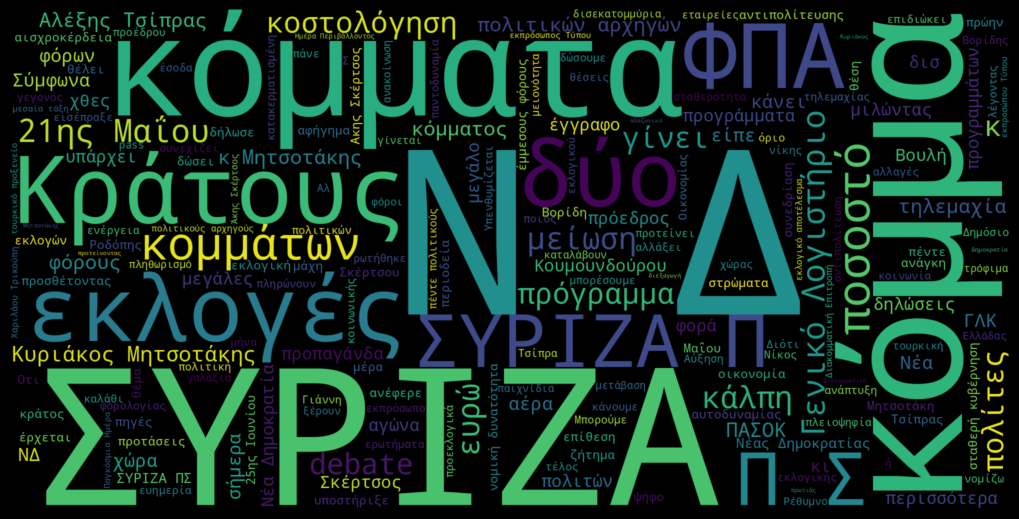

In [ ]:
# wordcloud = WordCloud(
#     stopwords = nlp.Defaults.stop_words,
#     width = 2000,
#     height = 1000,
#     background_color = 'black'
#  ).generate(' '.join(df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]))
# fig = plt.figure(
#     figsize = (10, 8),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

Κι αν θέλω να κάνω και lemmatization για να φύγουν οι διαφορετικές πτώσεις των ίδιων λέξεων:

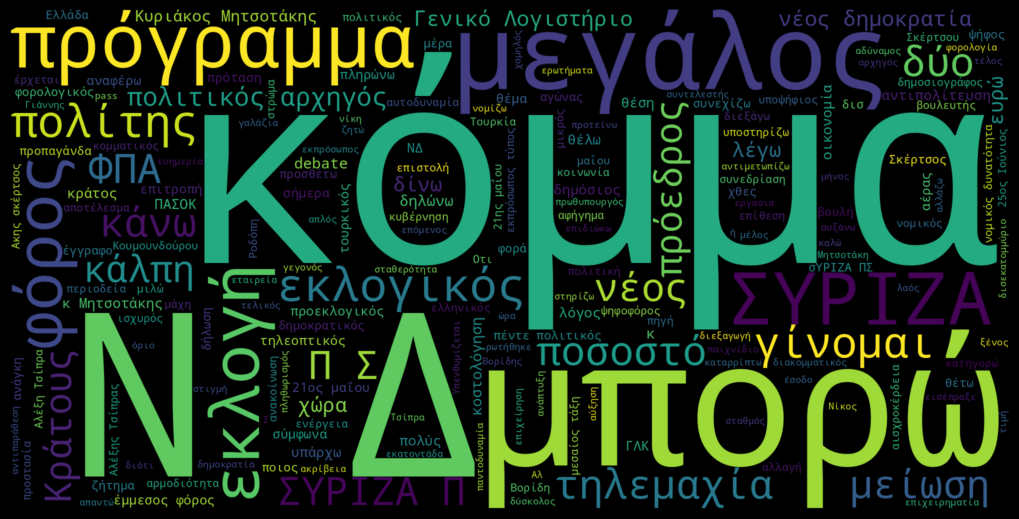

In [ ]:
# wordcloud = WordCloud(
#     stopwords = nlp.Defaults.stop_words,
#     width = 2000,
#     height = 1000,
#     background_color = 'black'
#  ).generate(' '.join(token.lemma_ for token in nlp(' '.join(df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]))))
# fig = plt.figure(
#     figsize = (10, 8),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

Για όποιον θα ήθελε να παίξει με την εμφάνιση του wordcloud: https://amueller.github.io/word_cloud/auto_examples/index.html

## ΣΥΜΠΕΡΑΣΜΑΤΑ

Τέλος, γράψτε ένα σύντομο κείμενο για τα ευρήματα των αναλύσεών σας.

Στο 2ο wordcloud έχουν αφαιρεθεί οι πτώσεις των λέξεων και όλες έχουν επιστρέψει στην ονομαστική. Όλες οι λέξεις προέρχονταοι από την στήλη "ΠΟΛΙΤΙΚΗ".